<a href="https://colab.research.google.com/github/Hanno-stud/task3-day3-Elevate-Labs/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Housing.csv to Housing.csv

--- Model Evaluation ---
Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
R-squared (R²) Score: 0.6529

--- Model Coefficients ---
                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
7                      basement_yes  3.902512e+05
8               hotwaterheating_yes  6.846499e+05
9               airconditioning_yes  7.914267e+05
10                     prefarea_yes  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05

Intercept: 260032.35760741215


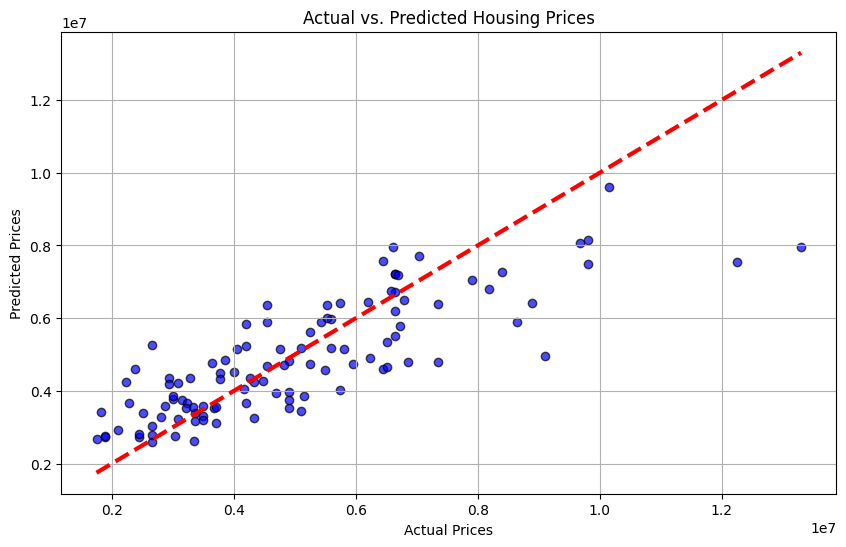

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


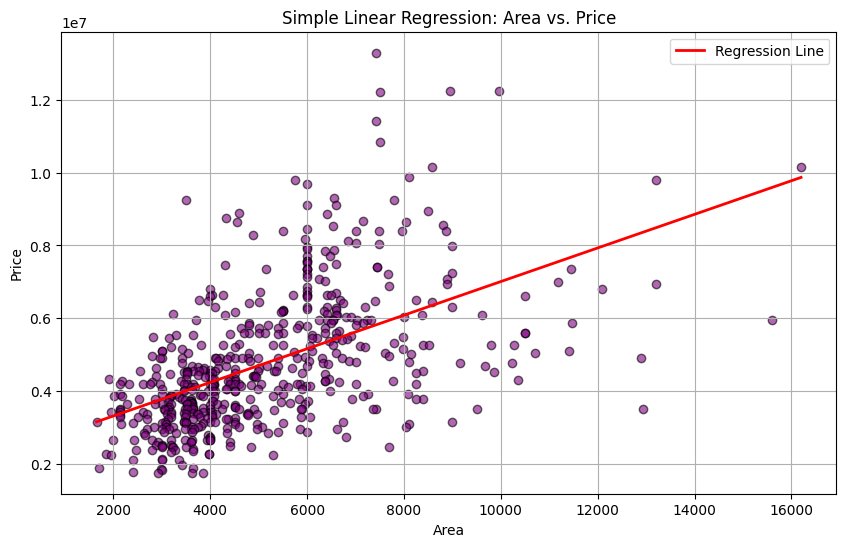

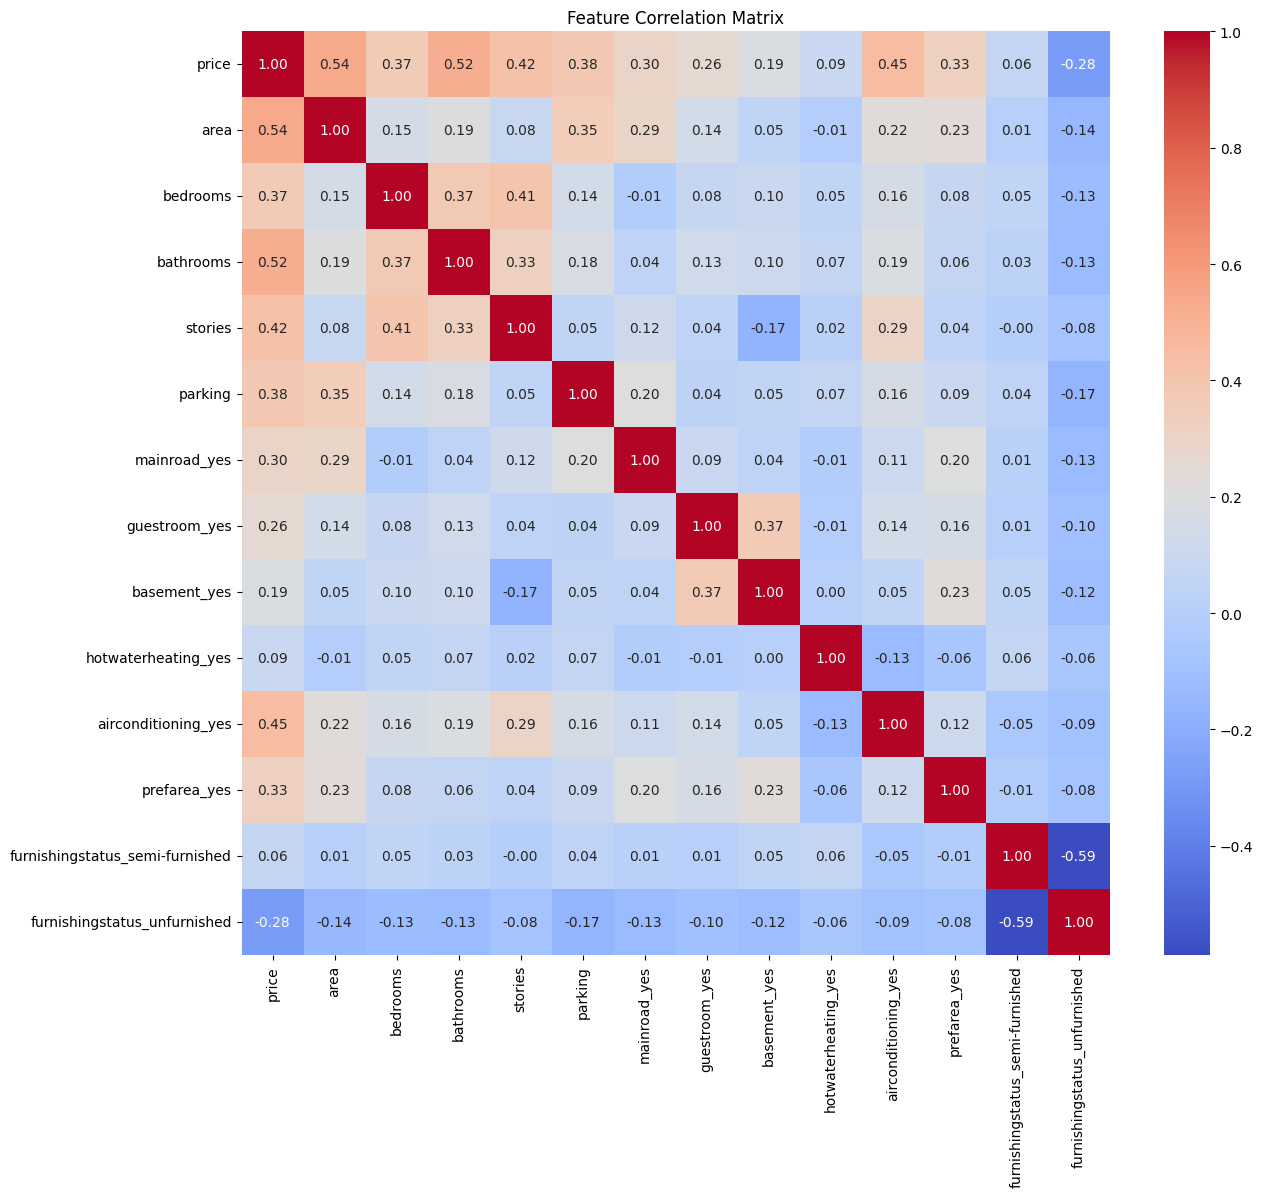

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 📤 Upload the cleaned Titanic dataset
from google.colab import files
uploaded = files.upload()

# Load Dataset
housing_df = pd.read_csv('Housing.csv')

# Preprocessing - Encode Categorical Variables
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
housing_df_encoded = pd.get_dummies(housing_df, columns=categorical_columns, drop_first=True)

# Define Independent and Dependent Variables
X = housing_df_encoded.drop('price', axis=1)
y = housing_df_encoded['price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.4f}")

# Print Coefficients and Intercept
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\n--- Model Coefficients ---")
print(coefficients)

print(f"\nIntercept: {model.intercept_}")

# Visualize Actual vs. Predicted Prices (Multivariable Model)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Housing Prices')
plt.grid(True)
plt.show()

# Special: Regression Line Plot for a Single Feature (Area vs. Price)
plt.figure(figsize=(10, 6))
plt.scatter(housing_df['area'], housing_df['price'], color='purple', edgecolors='k', alpha=0.6)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs. Price')

# Train Simple Linear Regression using only 'area'
X_area = housing_df[['area']]
y_price = housing_df['price']
simple_model = LinearRegression()
simple_model.fit(X_area, y_price)

# Plot regression line
area_range = np.linspace(X_area.min(), X_area.max(), 100).reshape(-1, 1)
predicted_prices = simple_model.predict(area_range)
plt.plot(area_range, predicted_prices, color='red', linewidth=2, label='Regression Line')
plt.legend()
plt.grid(True)
plt.show()

# Visualize Feature Correlations
plt.figure(figsize=(14, 12))
correlation_matrix = housing_df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()
